## GIS_Data_Science

### Assignment: GIS Data Science for Climate Change in Nepal


In [1]:
#install required libraries 
import pandas as pd 
import numpy as num 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats

In [2]:

nepal = gpd.read_file(r"/Users/vizon/github-classroom/Omdena-NIC-Nepal/GIS_Project_II/gis-data-science-assignment-Vizon15/data/Shape_Data/local_unit.shp")
nepal_map = nepal.to_crs(epsg=4326)
nepal.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [3]:
# Nepal Admin  Region
admin_climate = gpd.read_file(r"/Users/vizon/github-classroom/Omdena-NIC-Nepal/GIS_Project_II/gis-data-science-assignment-Vizon15/data/nepal_climate_data/nepal_admin_regions.gpkg")
print(admin_climate.head(7))

            name  climate_vulnerability_2020  climate_vulnerability_2050  \
0     Province 1                    0.449816                    0.656665   
1     Province 2                    0.680286                    0.939022   
2        Bagmati                    0.592798                    0.837280   
3        Gandaki                    0.539463                    0.650687   
4        Lumbini                    0.362407                    0.540340   
5        Karnali                    0.362398                    0.525380   
6  Sudurpashchim                    0.323233                    0.408471   

                                            geometry  
0  POLYGON ((87 26.5, 88 27, 87.8 28, 87 28.5, 86...  
1  POLYGON ((85 26.5, 87 26.5, 86.5 27.5, 85 27.2...  
2  POLYGON ((85 27.2, 86.5 27.5, 86.2 28.5, 85 28...  
3  POLYGON ((83.5 27.5, 85 27.2, 85 28.2, 84 29, ...  
4  POLYGON ((82 27, 83.5 27.5, 83.5 28, 82.5 28.2...  
5  POLYGON ((81 28, 82.5 28.2, 83.5 28, 82.5 29.5...  
6  POL

In [4]:
# Extracing relevant columns for bar plot
data = admin_climate.iloc[:, 0:3]
print(data)

            name  climate_vulnerability_2020  climate_vulnerability_2050
0     Province 1                    0.449816                    0.656665
1     Province 2                    0.680286                    0.939022
2        Bagmati                    0.592798                    0.837280
3        Gandaki                    0.539463                    0.650687
4        Lumbini                    0.362407                    0.540340
5        Karnali                    0.362398                    0.525380
6  Sudurpashchim                    0.323233                    0.408471


In [5]:
# melt the Dataframe
data_melted = pd.melt(data, id_vars=['name'], var_name='Year', value_name='Vulnerability')

#displaying the melted data
print(data_melted)

             name                        Year  Vulnerability
0      Province 1  climate_vulnerability_2020       0.449816
1      Province 2  climate_vulnerability_2020       0.680286
2         Bagmati  climate_vulnerability_2020       0.592798
3         Gandaki  climate_vulnerability_2020       0.539463
4         Lumbini  climate_vulnerability_2020       0.362407
5         Karnali  climate_vulnerability_2020       0.362398
6   Sudurpashchim  climate_vulnerability_2020       0.323233
7      Province 1  climate_vulnerability_2050       0.656665
8      Province 2  climate_vulnerability_2050       0.939022
9         Bagmati  climate_vulnerability_2050       0.837280
10        Gandaki  climate_vulnerability_2050       0.650687
11        Lumbini  climate_vulnerability_2050       0.540340
12        Karnali  climate_vulnerability_2050       0.525380
13  Sudurpashchim  climate_vulnerability_2050       0.408471


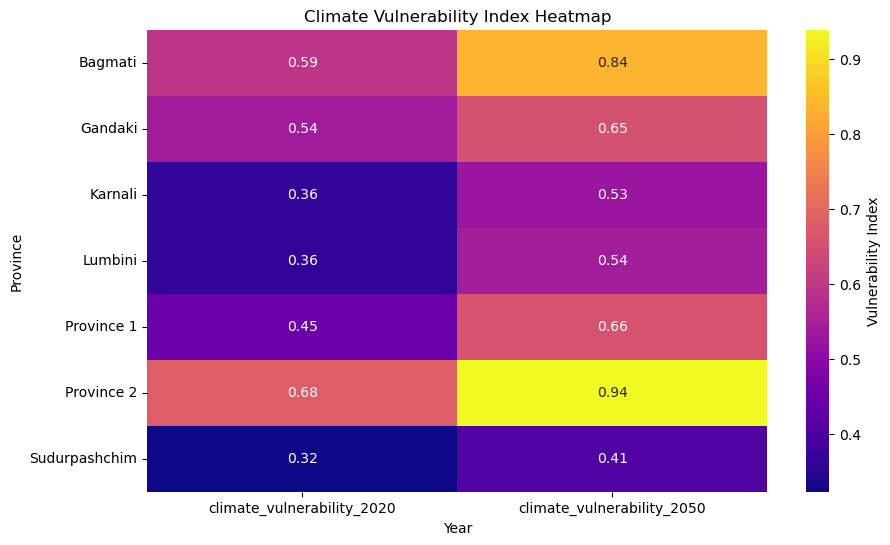

In [6]:
# Pivot the DataFrame for heatmap
pivot_data = data_melted.pivot(index="name", columns="Year", values="Vulnerability")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='plasma', cbar_kws={'label': 'Vulnerability Index'})
plt.title('Climate Vulnerability Index Heatmap')
plt.xlabel('Year')
plt.ylabel('Province')
plt.show()

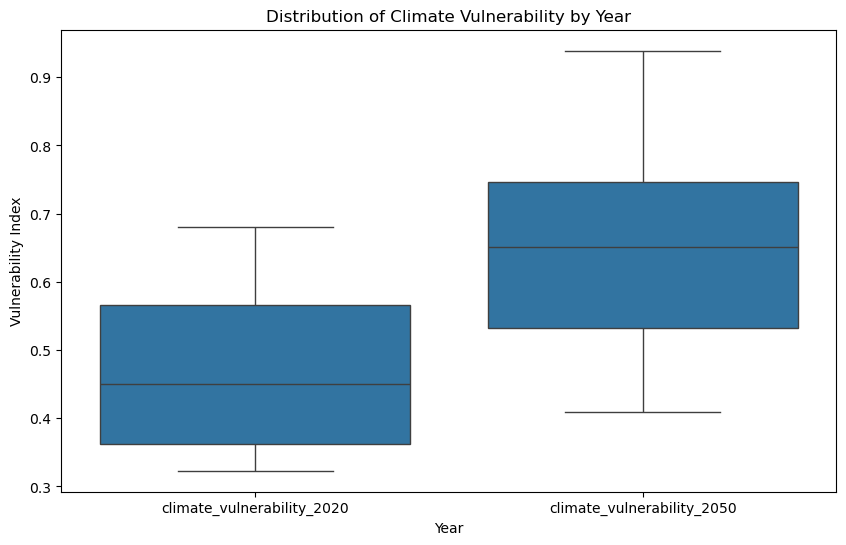

In [7]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Vulnerability', data=data_melted)
plt.title('Distribution of Climate Vulnerability by Year')
plt.xlabel('Year')
plt.ylabel('Vulnerability Index')
plt.show()

### Findings
Rising Climate Vulnerability Indices The heatmap visualization highlights a consistent increase in climate vulnerability indices across Nepal’s provinces from 2020 to 2050.

- Province 2 emerges as a hotspot for vulnerability.

- Sudurpashchim, though the least vulnerable, still shows a notable upward trend.

- Widening Disparities The box plot analysis for 2050 reveals:

- A higher median vulnerability index, signaling an overall worsening trend.

- Greater variability, with a wider interquartile range compared to 2020, indicating that climate impacts are becoming increasingly uneven across provinces.

Some provinces are experiencing more drastic changes than others.

### Conclusion
The analyses from both heatmaps and box plots deliver a clear narrative: Nepal faces a worsening climate vulnerability trend, with greater disparities among provinces.

This calls for urgent action through:
- Region-Specific Adaptation Strategies: Tailored plans to address localized climate risks.

- Equity-Focused Policy Initiatives: Ensuring resources are allocated fairly to mitigate uneven impacts.

- Proactive Mitigation Efforts: Driving innovative solutions to curb worsening vulnerabilities.

The evidence speaks loudly: a warming and vulnerable Nepal requires bold and collaborative measures to reshape its climate resilience.

## Precipitation Data Analysis


In [8]:
 #Load Precipitation Data
with rasterio.open(r"/Users/vizon/github-classroom/Omdena-NIC-Nepal/GIS_Project_II/gis-data-science-assignment-Vizon15/data/nepal_climate_data/nepal_precipitation_2020.tif") as src:
    precip_2020 = src.read(1)
    affine_2020 = src.transform  # Extract affine transform
    meta = src.meta

with rasterio.open(r"/Users/vizon/github-classroom/Omdena-NIC-Nepal/GIS_Project_II/gis-data-science-assignment-Vizon15/data/nepal_climate_data/nepal_precipitation_2050.tif") as src:
    precip_2050 = src.read(1)
    affine_2050 = src.transform  # Extract affine transform

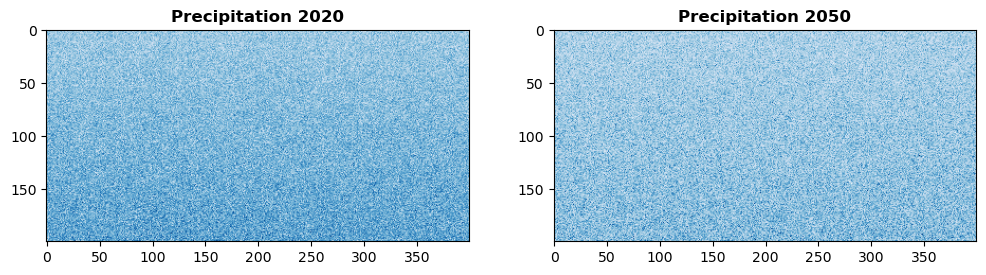

In [9]:
# Visualize precipitation data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
show(precip_2020, ax=ax[0], title="Precipitation 2020", cmap="Blues")
show(precip_2050, ax=ax[1], title="Precipitation 2050", cmap="Blues")
plt.show()

In [10]:
# Zonal statistics
zs_2020 = zonal_stats(nepal_map, precip_2020, affine=affine_2020, nodata=-999,  # Pass the affine transform
    stats=["mean", "min", "max"])
zs_2050 = zonal_stats(nepal_map, precip_2050, affine=affine_2050,nodata=-999,  # Pass the affine transform
    stats=["mean", "min", "max"])

In [11]:
# Add zonal stats to the shapefile
nepal["mean_precip_2020"] = [x["mean"] for x in zs_2020]
nepal["mean_precip_2050"] = [x["mean"] for x in zs_2050]

nepal["max_precip_2020"] = [x["max"] for x in zs_2020]
nepal["max_precip_2050"] = [x["max"] for x in zs_2050]

nepal["min_precip_2020"] = [x["min"] for x in zs_2020]
nepal["min_precip_2050"] = [x["min"] for x in zs_2050]

nepal.columns

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry', 'mean_precip_2020', 'mean_precip_2050', 'max_precip_2020',
       'max_precip_2050', 'min_precip_2020', 'min_precip_2050'],
      dtype='object')

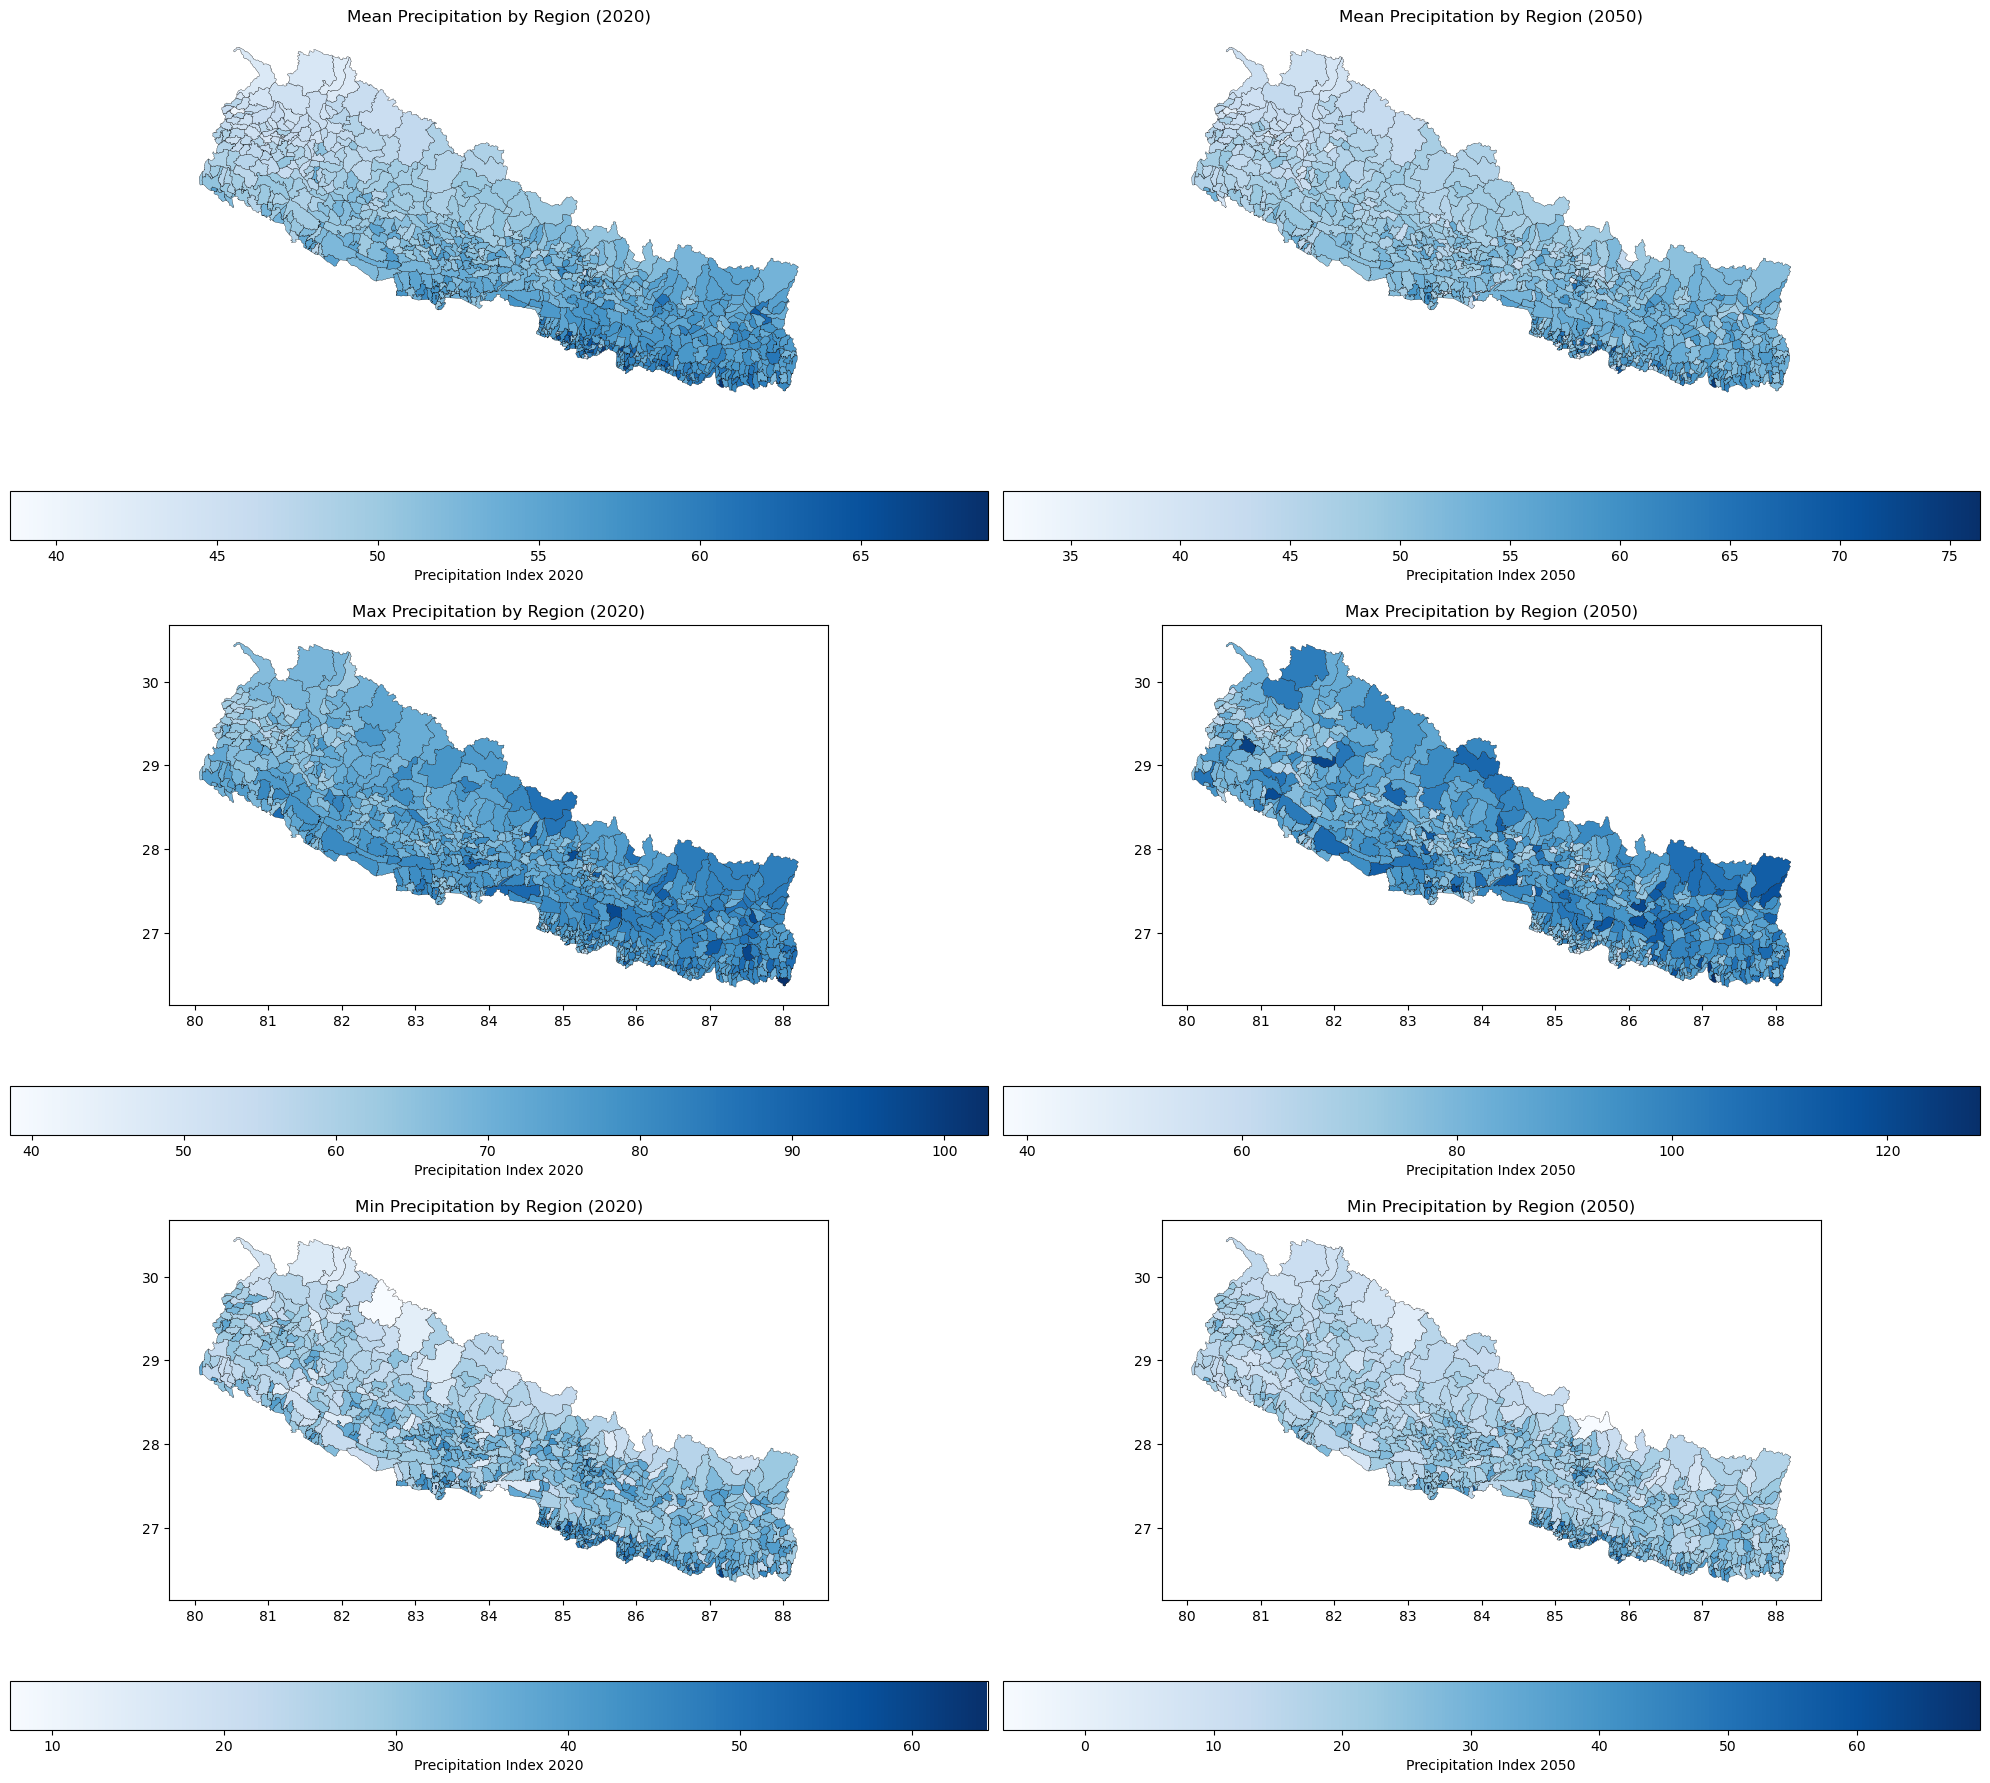

In [12]:
# Visualize regional trends
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
nepal.plot(column="mean_precip_2020", ax=ax[0,0], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[0,0].set_title("Mean Precipitation by Region (2020)")
ax[0,0].set_axis_off()

nepal.plot(column="mean_precip_2050", ax=ax[0,1], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[0,1].set_title("Mean Precipitation by Region (2050)")
ax[0,1].set_axis_off()


nepal.plot(column="max_precip_2020", ax=ax[1,0], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[1,0].set_title("Max Precipitation by Region (2020)")

nepal.plot(column="max_precip_2050", ax=ax[1,1], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[1,1].set_title("Max Precipitation by Region (2050)")

nepal.plot(column="min_precip_2020", ax=ax[2,0], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[2,0].set_title("Min Precipitation by Region (2020)")
nepal.plot(column="min_precip_2050", ax=ax[2,1], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[2,1].set_title("Min Precipitation by Region (2050)")

plt.tight_layout()
plt.show()

### Finding:

- Mean Precipitation: The eastern region of Nepal, which traditionally receives more rainfall than the west, is expected to experience a notable decline in precipitation between 2020 and 2050.
- Maximum Precipitation: By 2050, peak rainfall levels will increase, particularly in the Himalayan and Terai regions, signaling a higher risk of extreme weather events.
- Minimum Precipitation: Areas with historically low precipitation in 2020 are projected to see an increase, while regions with higher minimum precipitation may experience a decline, suggesting a redistribution of rainfall.

### Conclusion:

Nepal's precipitation trends from 2020 to 2050 suggest a decline in mean rainfall in the east, an increase in extreme rainfall events nationwide, and shifts in minimum precipitation levels. These changes demand proactive strategies in water resource planning, disaster risk reduction, and agricultural adaptation to ensure resilience against evolving climate challenges.


## Temperature Data Analysis


In [13]:
#Load Temperature Data
with rasterio.open(r"/Users/vizon/github-classroom/Omdena-NIC-Nepal/GIS_Project_II/gis-data-science-assignment-Vizon15/data/nepal_climate_data/nepal_temperature_2020.tif") as src:
    temperature_2020 = src.read(1)
    affine2_2020 = src.transform  # Extract affine transform
    meta = src.meta

with rasterio.open(r"/Users/vizon/github-classroom/Omdena-NIC-Nepal/GIS_Project_II/gis-data-science-assignment-Vizon15/data/nepal_climate_data/nepal_temperature_2050.tif") as src:
    temperature_2050 = src.read(1)
    affine2_2050 = src.transform  # Extract affine transform

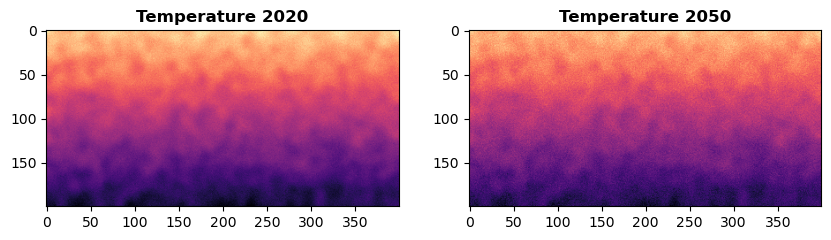

In [14]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
show(temperature_2020, ax=ax[0], title="Temperature 2020", cmap="magma")
show(temperature_2050, ax=ax[1], title="Temperature 2050", cmap="magma")
plt.show()

In [15]:
# Zonal statistics
zs2_2020 = zonal_stats(nepal, temperature_2020, affine=affine2_2020,  # Pass the affine transform
    stats=["mean", "min", "max"])
zs2_2050 = zonal_stats(nepal, temperature_2050, affine=affine2_2050,  # Pass the affine transform
    stats=["mean", "min", "max"])

/Users/vizon/anaconda3/envs/gis_env/lib/python3.11/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [16]:
# Add zonal stats to the shapefile
nepal["mean_temp_2020"] = [x["mean"] for x in zs2_2020]
nepal["mean_temp_2050"] = [x["mean"] for x in zs2_2050]

nepal["max_temp_2020"] = [x["max"] for x in zs2_2020]
nepal["max_temp_2050"] = [x["max"] for x in zs2_2050]

nepal["min_temp_2020"] = [x["min"] for x in zs2_2020]
nepal["min_temp_2050"] = [x["min"] for x in zs2_2050]

nepal.columns

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry', 'mean_precip_2020', 'mean_precip_2050', 'max_precip_2020',
       'max_precip_2050', 'min_precip_2020', 'min_precip_2050',
       'mean_temp_2020', 'mean_temp_2050', 'max_temp_2020', 'max_temp_2050',
       'min_temp_2020', 'min_temp_2050'],
      dtype='object')

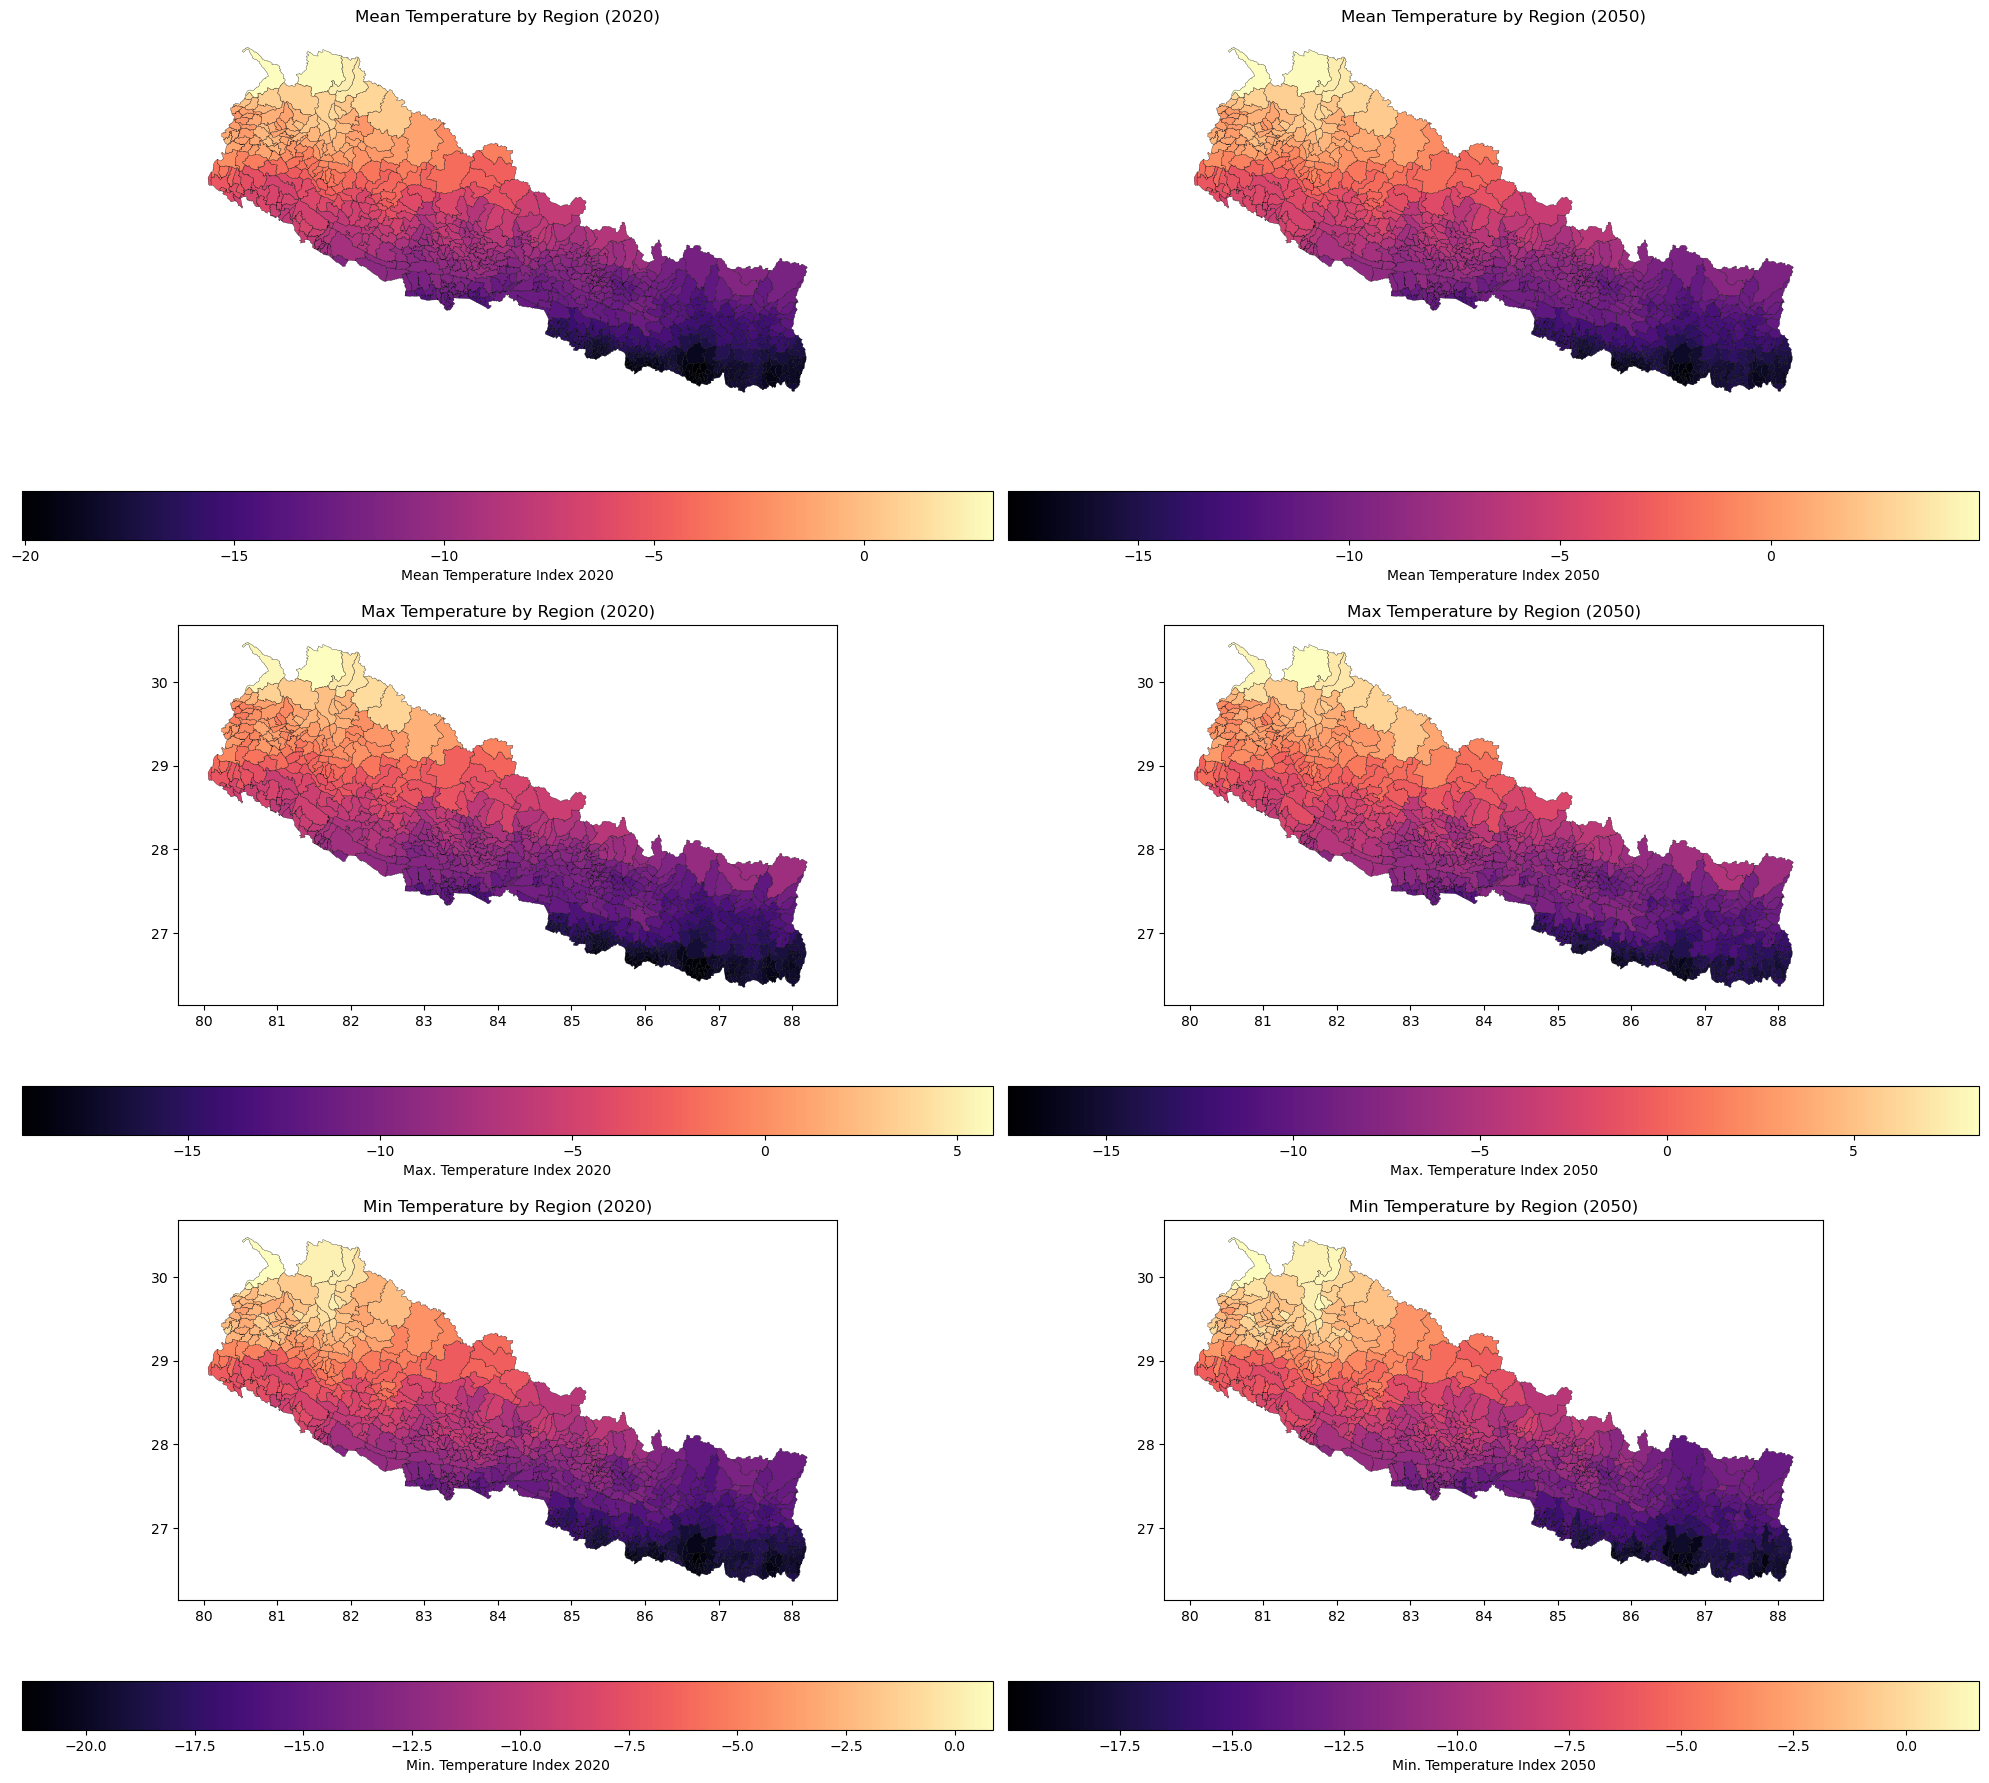

In [17]:
# Visualize regional trends
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
nepal.plot(column="mean_temp_2020", ax=ax[0,0], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Mean Temperature Index 2020", 'orientation': "horizontal"})
ax[0,0].set_title("Mean Temperature by Region (2020)")
ax[0,0].set_axis_off()

nepal.plot(column="mean_temp_2050", ax=ax[0,1], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Mean Temperature Index 2050", 'orientation': "horizontal"})
ax[0,1].set_title("Mean Temperature by Region (2050)")
ax[0,1].set_axis_off()


nepal.plot(column="max_temp_2020", ax=ax[1,0], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Max. Temperature Index 2020", 'orientation': "horizontal"})
ax[1,0].set_title("Max Temperature by Region (2020)")

nepal.plot(column="max_temp_2050", ax=ax[1,1], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Max. Temperature Index 2050", 'orientation': "horizontal"})
ax[1,1].set_title("Max Temperature by Region (2050)")

nepal.plot(column="min_temp_2020", ax=ax[2,0], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Min. Temperature Index 2020", 'orientation': "horizontal"})
ax[2,0].set_title("Min Temperature by Region (2020)")
nepal.plot(column="min_temp_2050", ax=ax[2,1], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Min. Temperature Index 2050", 'orientation': "horizontal"})
ax[2,1].set_title("Min Temperature by Region (2050)")

plt.tight_layout()
plt.show()

### Findings
- Rising Mean Temperature Nepal is experiencing a gradual and consistent increase in average temperatures from 2020 to 2050, reflecting broader global climate warming trends.

- Stable Maximum Temperature While peak daytime temperatures have seen slight increases, there is no significant rise in extreme heat events, which indicates a relative stability in this metric.

- Increasing Minimum Temperature A notable surge in nighttime temperatures has been observed, signaling a shift towards warmer nights.

### Conclusion
Nepal is on a path of gradual warming, with nighttime temperatures rising as a significant marker of this trend from 2020 to 2050. While maximum temperatures remain stable, the rise in minimum temperatures highlights critical climate shifts that carry far-reaching environmental, agricultural, and socio-economic implications.

This underscores the urgency for:

🌱 Climate Adaptation Policies: Tailored responses to mitigate the impact of warming.

🌐 Sustainable Resource Management: Preserving natural resources for future resilience.

🚀 Proactive Mitigation Strategies: Innovations and actions to counteract climate challenges.

The data reveals a story: a warming Nepal where proactive measures today will dictate the resilience of tomorrow.